In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('MusicandMind_Dataset.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [4]:
df.corr()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.000000,-0.044638,-0.029928,-0.176662,-0.121563,0.006909,-0.130114
Hours per day,-0.044638,1.000000,0.042554,0.049319,0.110527,0.141821,0.118729
BPM,-0.029928,0.042554,1.000000,-0.027050,0.041371,0.053591,0.018927
Anxiety,-0.176662,0.049319,-0.027050,1.000000,0.519969,0.292669,0.348350
Depression,-0.121563,0.110527,0.041371,0.519969,1.000000,0.378996,0.196988
Insomnia,0.006909,0.141821,0.053591,0.292669,0.378996,1.000000,0.226354
OCD,-0.130114,0.118729,0.018927,0.348350,0.196988,0.226354,1.000000


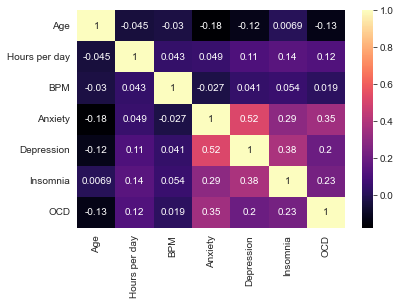

In [5]:
sns.set_style('whitegrid')
dataplot = sns.heatmap(df.corr(), cmap="magma", annot=True)
plt.show()

The correlation matrix above comprises of those variables only who have numerical values.

# Data Preprocessing

In [6]:
# storing the specific columns as new variables

mental_health_conditions = df.loc[:, ['Anxiety', 'Depression', 'Insomnia', 'OCD']]
music_effects = df['Music effects']

df_original = df.copy()

# cleaning the df

#  changing categorical values to numeric
cat_columns = df.select_dtypes(['object']).columns
cat_columns = cat_columns[1:]
cat_columns
for col in cat_columns:
  df[col] = df[col].astype('category')
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

# dropping the first and last columns as they are useless
df = df.drop(['Timestamp', 'Permissions'], axis=1)

# dealing with the NaN values
df['Age'] = df['Age'].fillna(round(df['Age'].mean(), 0))
df['Primary streaming service'] = df['Primary streaming service'].fillna(df['Primary streaming service'].mode()[0])
df['While working'] = df['While working'].fillna(df['While working'].mode()[0])
df['Instrumentalist'] = df['Instrumentalist'].fillna(df['Instrumentalist'].mode()[0])
df['Composer'] = df['Composer'].fillna(df['Composer'].mode()[0])
df['Foreign languages'] = df['Foreign languages'].fillna(df['Foreign languages'].mode()[0])
df['Music effects'] = df['Music effects'].fillna(df['Music effects'].mode()[0])

# dealing with BPM column separately
lst_missing_bpm_genres = list(df_original[df_original['BPM'].isnull() == True]['Fav genre'].unique())
for i in lst_missing_bpm_genres:
  df['BPM'] = df['BPM'].fillna(round(df[df['Fav genre'] == i]['BPM'].mean(), 0))



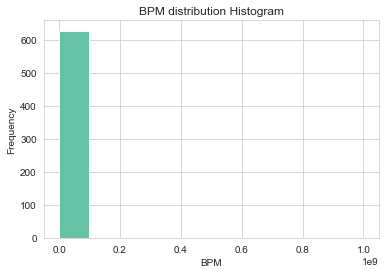

In [7]:
plt.hist(df['BPM'])
plt.title('BPM distribution Histogram')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.show()

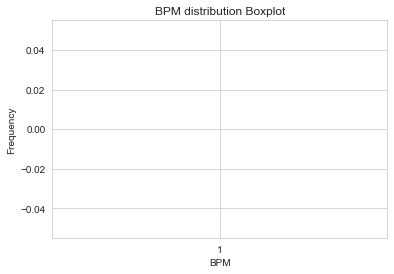

In [8]:
plt.boxplot(df['BPM'])
plt.title('BPM distribution Boxplot')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.show()

The plots above come out to be wrong because of the presence of an outlier in the data which is causing the mass data to shrink towards the left in the plot.

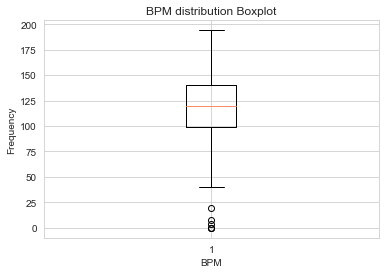

In [9]:
# removing outlier from BPM column
df = df[df['BPM'] < 200]
plt.boxplot(df['BPM'])
plt.title('BPM distribution Boxplot')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.show()

# Preliminary Data Analysis Plots

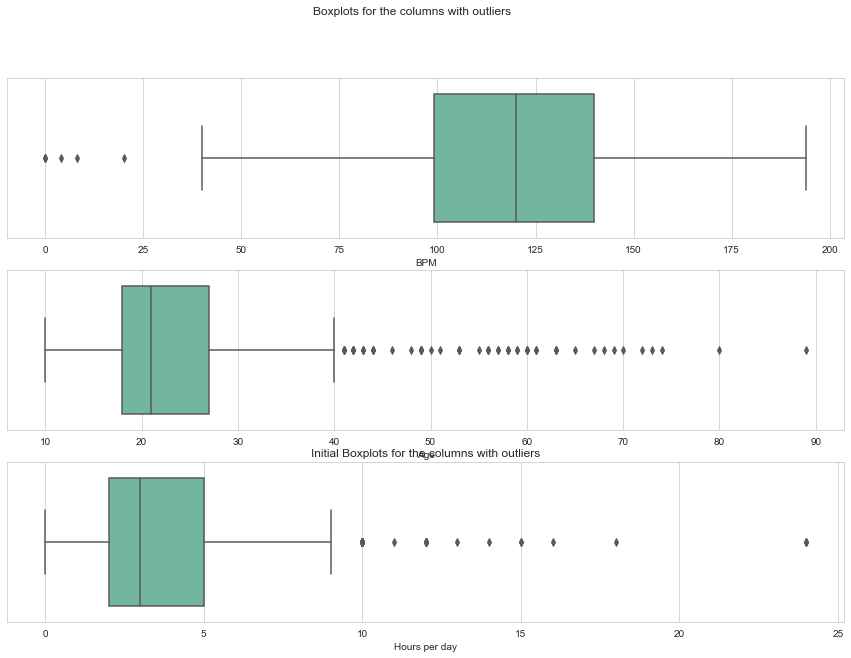

In [10]:
# box plots for the columns with outliers
fig, ax = plt.subplots(3, figsize=(15, 10))
fig.suptitle('Boxplots for the columns with outliers')

sns.boxplot(x=df['BPM'], ax=ax[0])
sns.boxplot(x=df['Age'], ax=ax[1])
sns.boxplot(x=df['Hours per day'], ax=ax[2])
plt.title('Initial Boxplots for the columns with outliers')
plt.savefig('./Plots/Initial Boxplots for the columns with outliers.png')
plt.show()


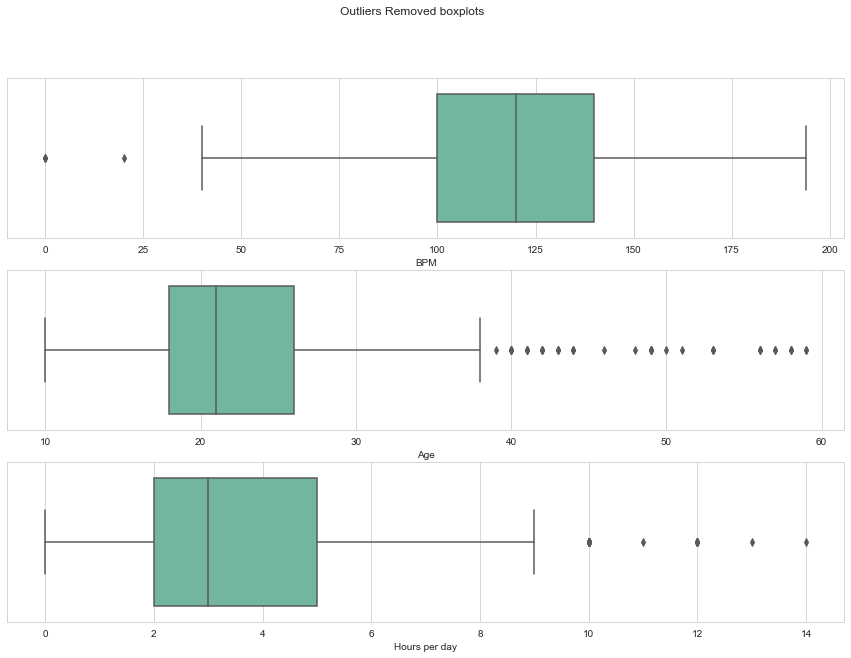

In [11]:
# now removing the outliers from the columns
df = df[df['BPM'] < 200]
df = df[df['Age'] < 60]
df = df[df['Hours per day'] < 15]

# now plotting the box plots again

fig, ax = plt.subplots(3, figsize=(15, 10))
fig.suptitle('Outliers Removed boxplots')
sns.boxplot(x=df['BPM'], ax=ax[0])
sns.boxplot(x=df['Age'], ax=ax[1])
sns.boxplot(x=df['Hours per day'], ax=ax[2])
plt.savefig('./Plots/Outliers Removed boxplots.png')
plt.show()

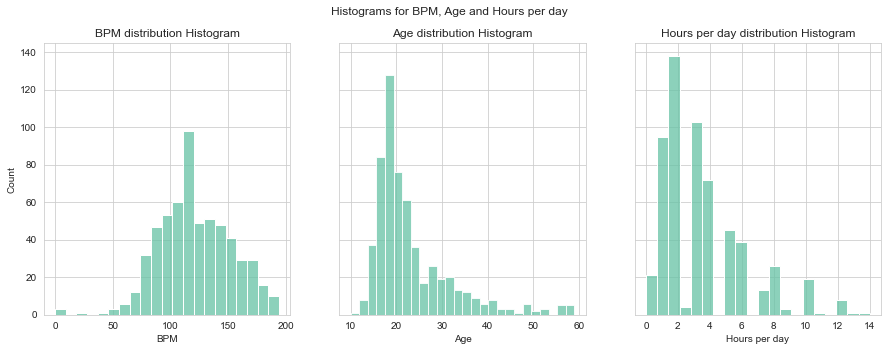

In [12]:
fig, ax= plt.subplots(1, 3, sharey=True, figsize=(15, 5))
fig.suptitle('Histograms for BPM, Age and Hours per day')

sns.histplot(df['BPM'], ax=ax[0])
ax[0].set_title('BPM distribution Histogram')

sns.histplot(df['Age'], ax=ax[1])
ax[1].set_title('Age distribution Histogram')

sns.histplot(df['Hours per day'],  ax=ax[2])
ax[2].set_title('Hours per day distribution Histogram')

plt.savefig('./Plots/BPM_Histogram_distribution.png')
plt.show()


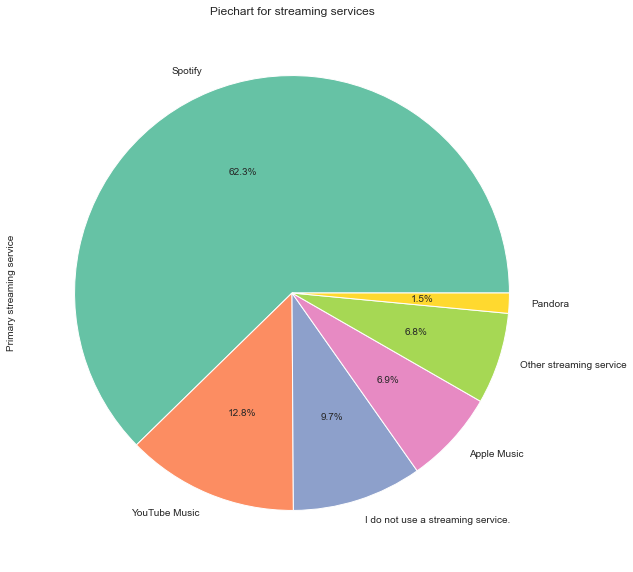

In [13]:
# piechart for streaming services using seaborn
plt.figure(figsize=(10, 10))
df_original['Primary streaming service'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Piechart for streaming services')
plt.savefig('./Plots/Piechart for streaming services.png')
plt.show()

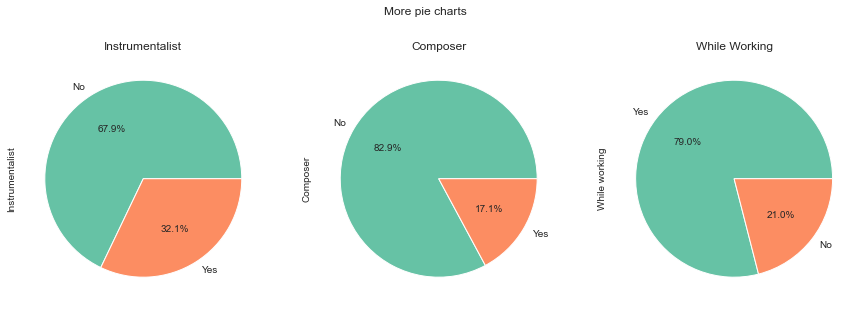

In [14]:
fig , ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('More pie charts')

# Instrumentalist background pie chart
df_original['Instrumentalist'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Instrumentalist')

# composer background pie chart
df_original['Composer'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Composer')

# effect of working pie chart
df_original['While working'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[2])
ax[2].set_title('While Working')



plt.savefig('./Plots/More pie charts.png')
plt.show()


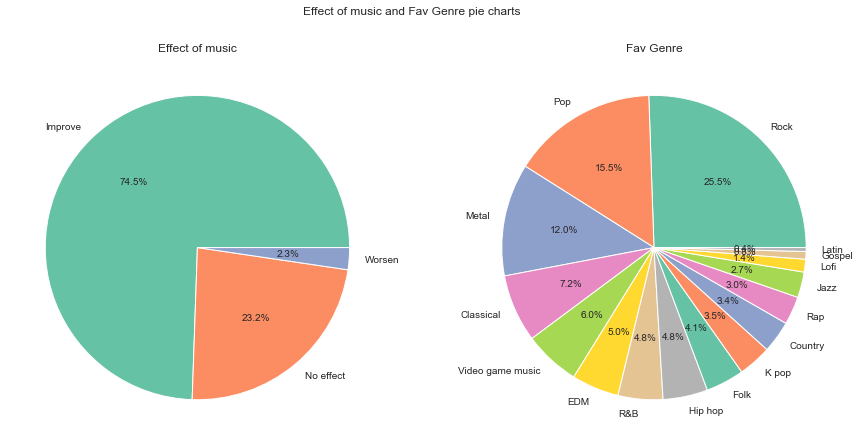

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Effect of music and Fav Genre pie charts')

# effect of music pie chart
df_original['Music effects'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Effect of music')
ax[0].set_ylabel('')

# Fav Genre pie chart
df_original['Fav genre'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Fav Genre')
ax[1].set_ylabel('')


plt.savefig('./Plots/Effect of music and Fav Genre pie charts.png')
plt.show()

# Exploratory Data Analysis

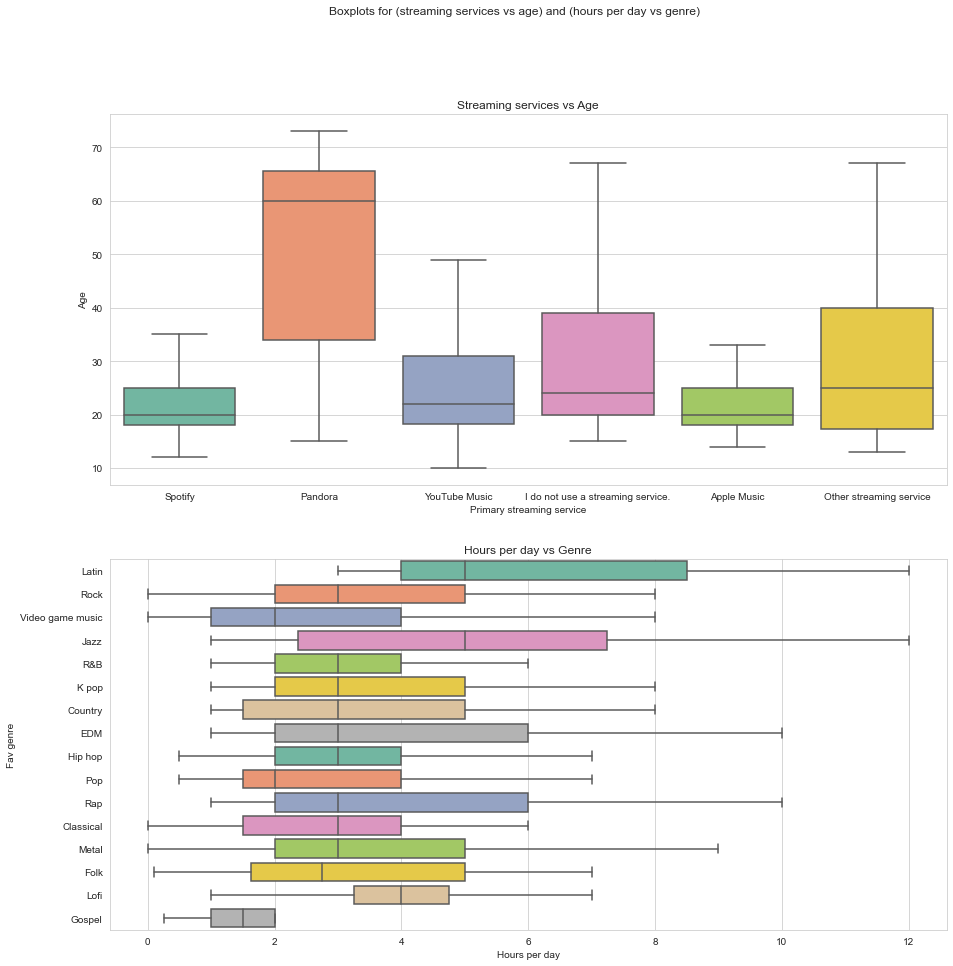

In [16]:
# box plot of streaming services vs age
fig, ax = plt.subplots(2, figsize=(15, 15))
fig.suptitle('Boxplots for (streaming services vs age) and (hours per day vs genre)')

sns.boxplot(x=df_original['Primary streaming service'], y=df_original['Age'], showfliers=False, palette='Set2', ax= ax[0])
ax[0].set_title('Streaming services vs Age')

sns.boxplot(x=df_original['Hours per day'], y=df_original['Fav genre'], showfliers=False, palette='Set2', ax= ax[1])
ax[1].set_title('Hours per day vs Genre')


# plt.title('Streaming services vs Age')
plt.savefig('./Plots/Streaming services vs Age.png')
plt.show()

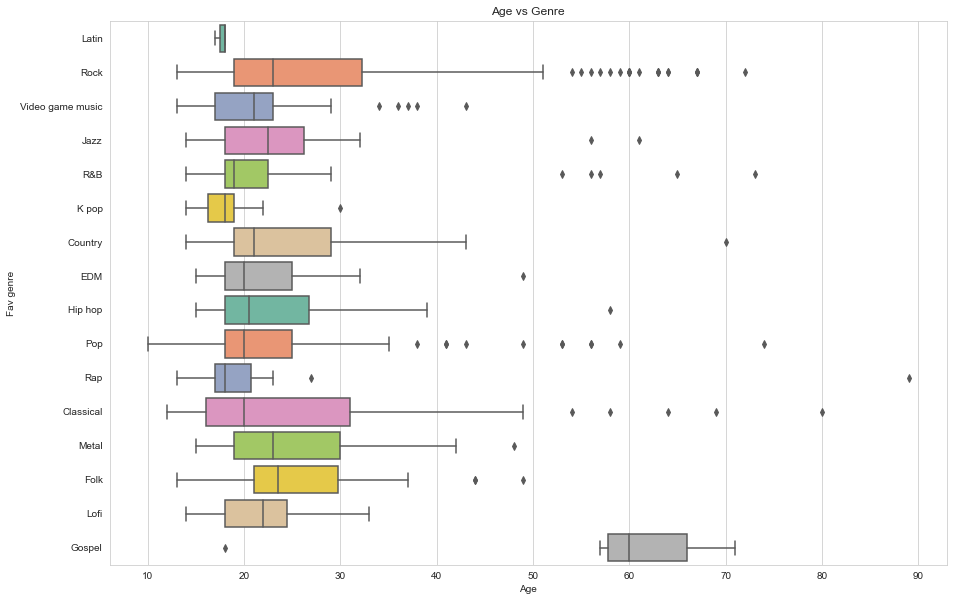

<Figure size 1080x720 with 0 Axes>

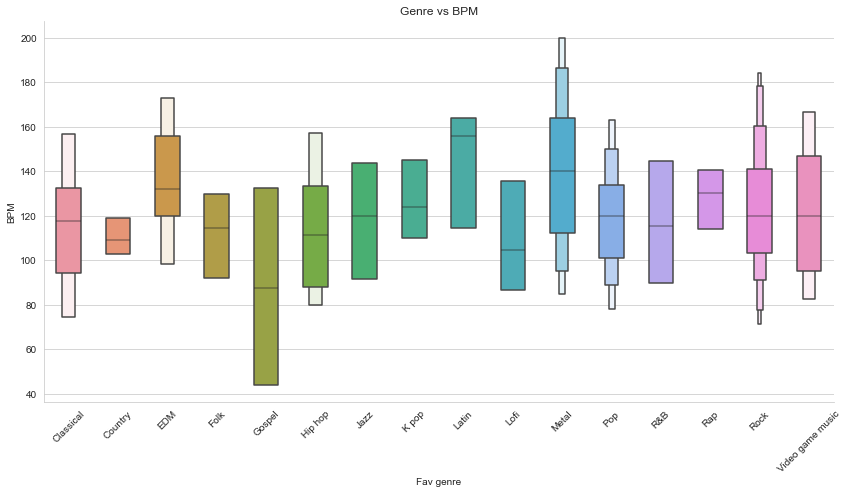

In [17]:
# box plot for age vs genre
plt.figure(figsize=(15, 10))
sns.boxplot(x=df_original['Age'], y=df_original['Fav genre'], palette='Set2')
plt.title('Age vs Genre')
plt.savefig('./Plots/Age vs Genre violin plot.png')
plt.show()

plt.figure(figsize=(15, 10))
sns.catplot(
    data=df_original.sort_values("Fav genre"),
    x="Fav genre", y="BPM", kind="boxen",
    height=6, aspect=2,
    width = 0.5,
    showfliers=False,
)

plt.xticks(rotation = 45)
plt.title('Genre vs BPM')
# plt.ylim(50, 210)
plt.savefig('./Plots/BPM vs Genre catplots.png')
plt.show()

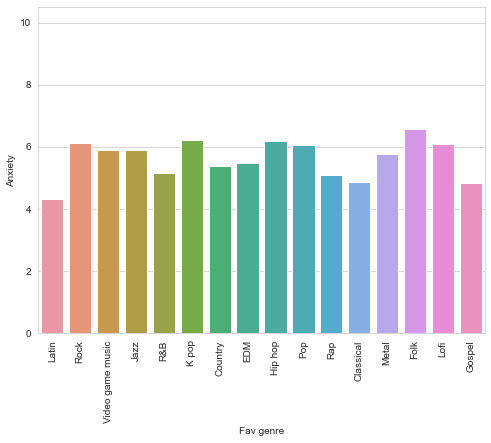

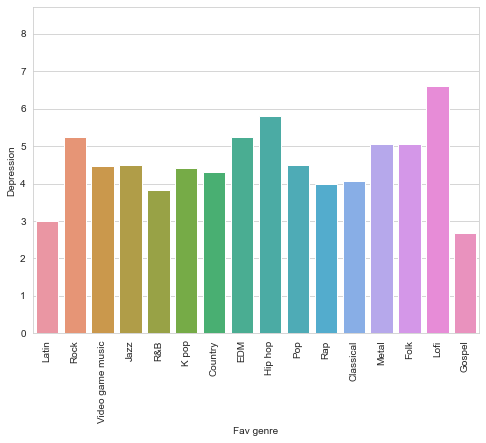

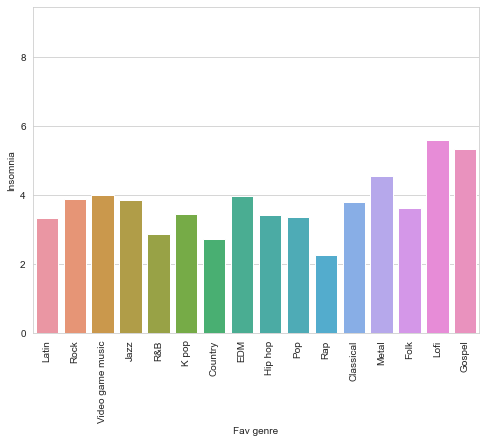

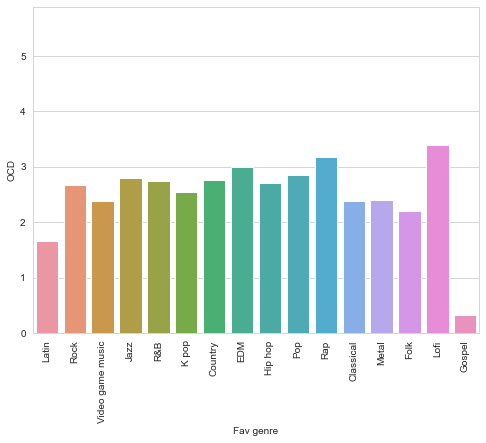

In [18]:
# fig, ax = plt.subplots(4, figsize = (10, 10))
plt.figure(figsize=(8, 6))
sns.barplot(x=df_original['Fav genre'], y=df_original['Anxiety'], errwidth=0)
plt.xticks(rotation=90)
plt.savefig("./Plots/Anxiety vs Fav Genre.png")
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=df_original['Fav genre'], y=df_original['Depression'], errwidth=0)
plt.xticks(rotation=90)
plt.savefig("./Plots/Depression vs Fav genre.png")
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=df_original['Fav genre'], y=df_original['Insomnia'], errwidth=0)
plt.xticks(rotation=90)
plt.savefig("./Plots/Insomnia vs Fav genre.png")
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=df_original['Fav genre'], y=df_original['OCD'], errwidth=0)
plt.xticks(rotation=90)
plt.savefig("./Plots/OCD vs Fav genre.png")
plt.show()



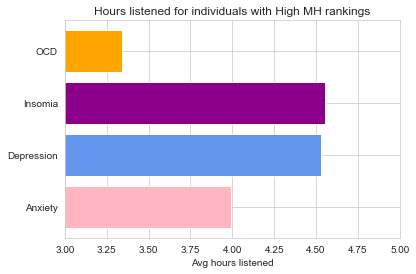

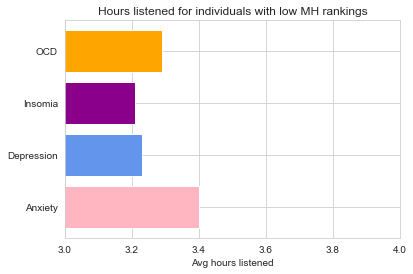

In [19]:
anxiety_extreme = df.loc[(df['Anxiety'] > 8)].mean()[2]
depression_extreme = df.loc[(df['Depression'] > 8)].mean()[2]
insomnia_extreme = df.loc[(df['Insomnia'] > 8)].mean()[2]
ocd_extreme = df.loc[(df['OCD'] > 8)].mean()[2]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(['Anxiety', 'Depression', 'Insomia', 'OCD'], extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with High MH rankings")
plt.xlim(3,5)
plt.savefig("./Plots/High MH vs avg hours.png")
plt.show()

anxiety_extreme = df.loc[(df['Anxiety'] < 3)].mean()[2]
depression_extreme = df.loc[(df['Depression'] < 3)].mean()[2]
insomnia_extreme = df.loc[(df['Insomnia'] < 3)].mean()[2]
ocd_extreme = df.loc[(df['OCD'] < 3)].mean()[2]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(['Anxiety', 'Depression', 'Insomia', 'OCD'], extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with low MH rankings")
plt.xlim(3,4)
plt.savefig("./Plots/Low MH vs avg hours.png")
plt.show()

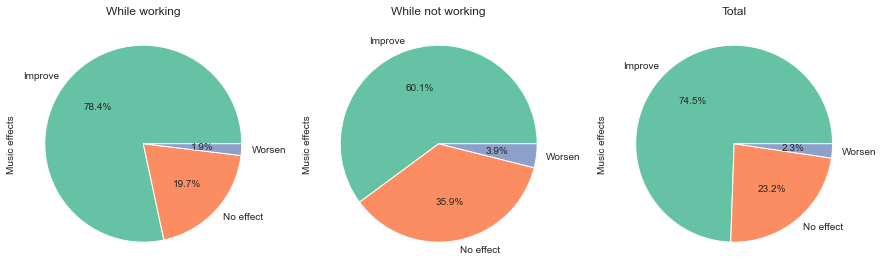

In [20]:
# plot while working vs music effect

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
impact = df_original[(df_original['While working'] == 'Yes')]
impact = impact['Music effects'].value_counts()
impact.plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('While working')

impact = df_original[(df_original['While working'] == 'No')]
impact = impact['Music effects'].value_counts()
impact.plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('While not working')

total = df_original['Music effects'].value_counts()
total.plot.pie(autopct='%1.1f%%', ax=ax[2])
ax[2].set_title('Total')

plt.savefig("./Plots/While working vs Music effects.png")
plt.show()


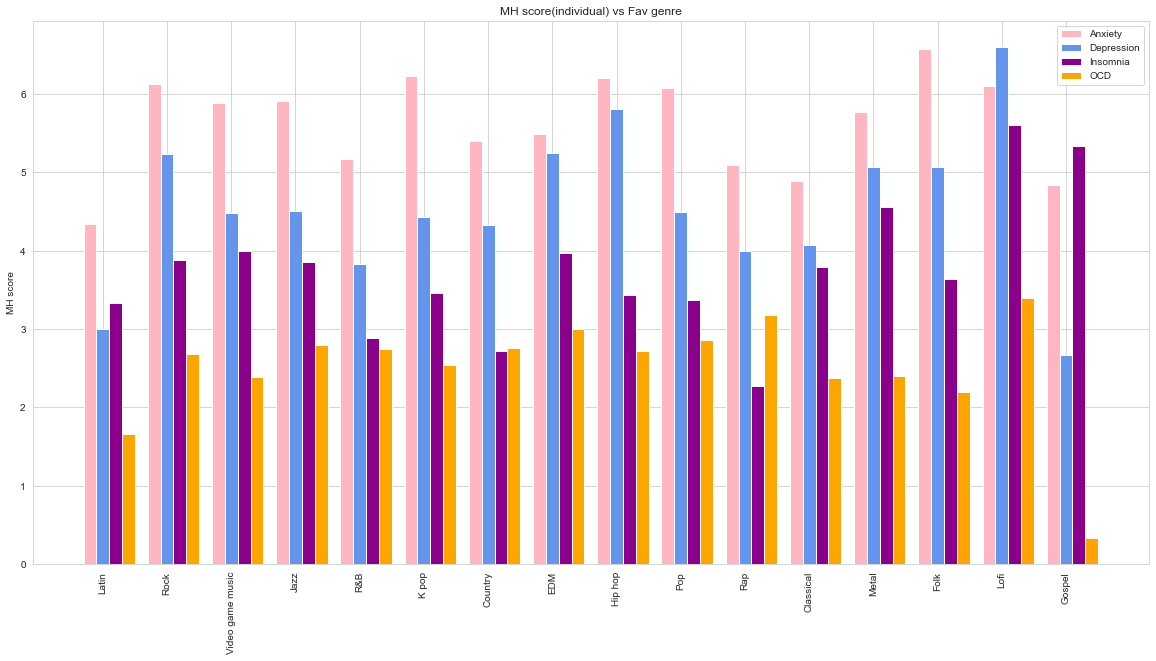

In [21]:
anxiety = []
depression = []
insomnia = []
ocd = []

for i in df_original['Fav genre'].unique():
    anxiety.append(df_original.loc[(df_original['Fav genre'] == i)].mean()[3])
    depression.append(df_original.loc[(df_original['Fav genre'] == i)].mean()[4])
    insomnia.append(df_original.loc[(df_original['Fav genre'] == i)].mean()[5])
    ocd.append(df_original.loc[(df_original['Fav genre'] == i)].mean()[6])

plt.figure(figsize=(20, 10))
x_axis = np.arange(len(df_original['Fav genre'].unique()))
plt.bar(x_axis-0.2, anxiety, 0.2, color='lightpink')
plt.bar(x_axis, depression, 0.2, color='cornflowerblue')
plt.bar(x_axis+0.2, insomnia, 0.2, color='darkmagenta')
plt.bar(x_axis+0.4, ocd, 0.2, color='orange')
plt.xticks(x_axis, df_original['Fav genre'].unique(), rotation=90)
plt.ylabel("MH score")
plt.legend(['Anxiety', 'Depression', 'Insomnia', 'OCD'])
plt.title("MH score(individual) vs Fav genre")
plt.savefig("./Plots/Genre vs MH.png")
plt.show()

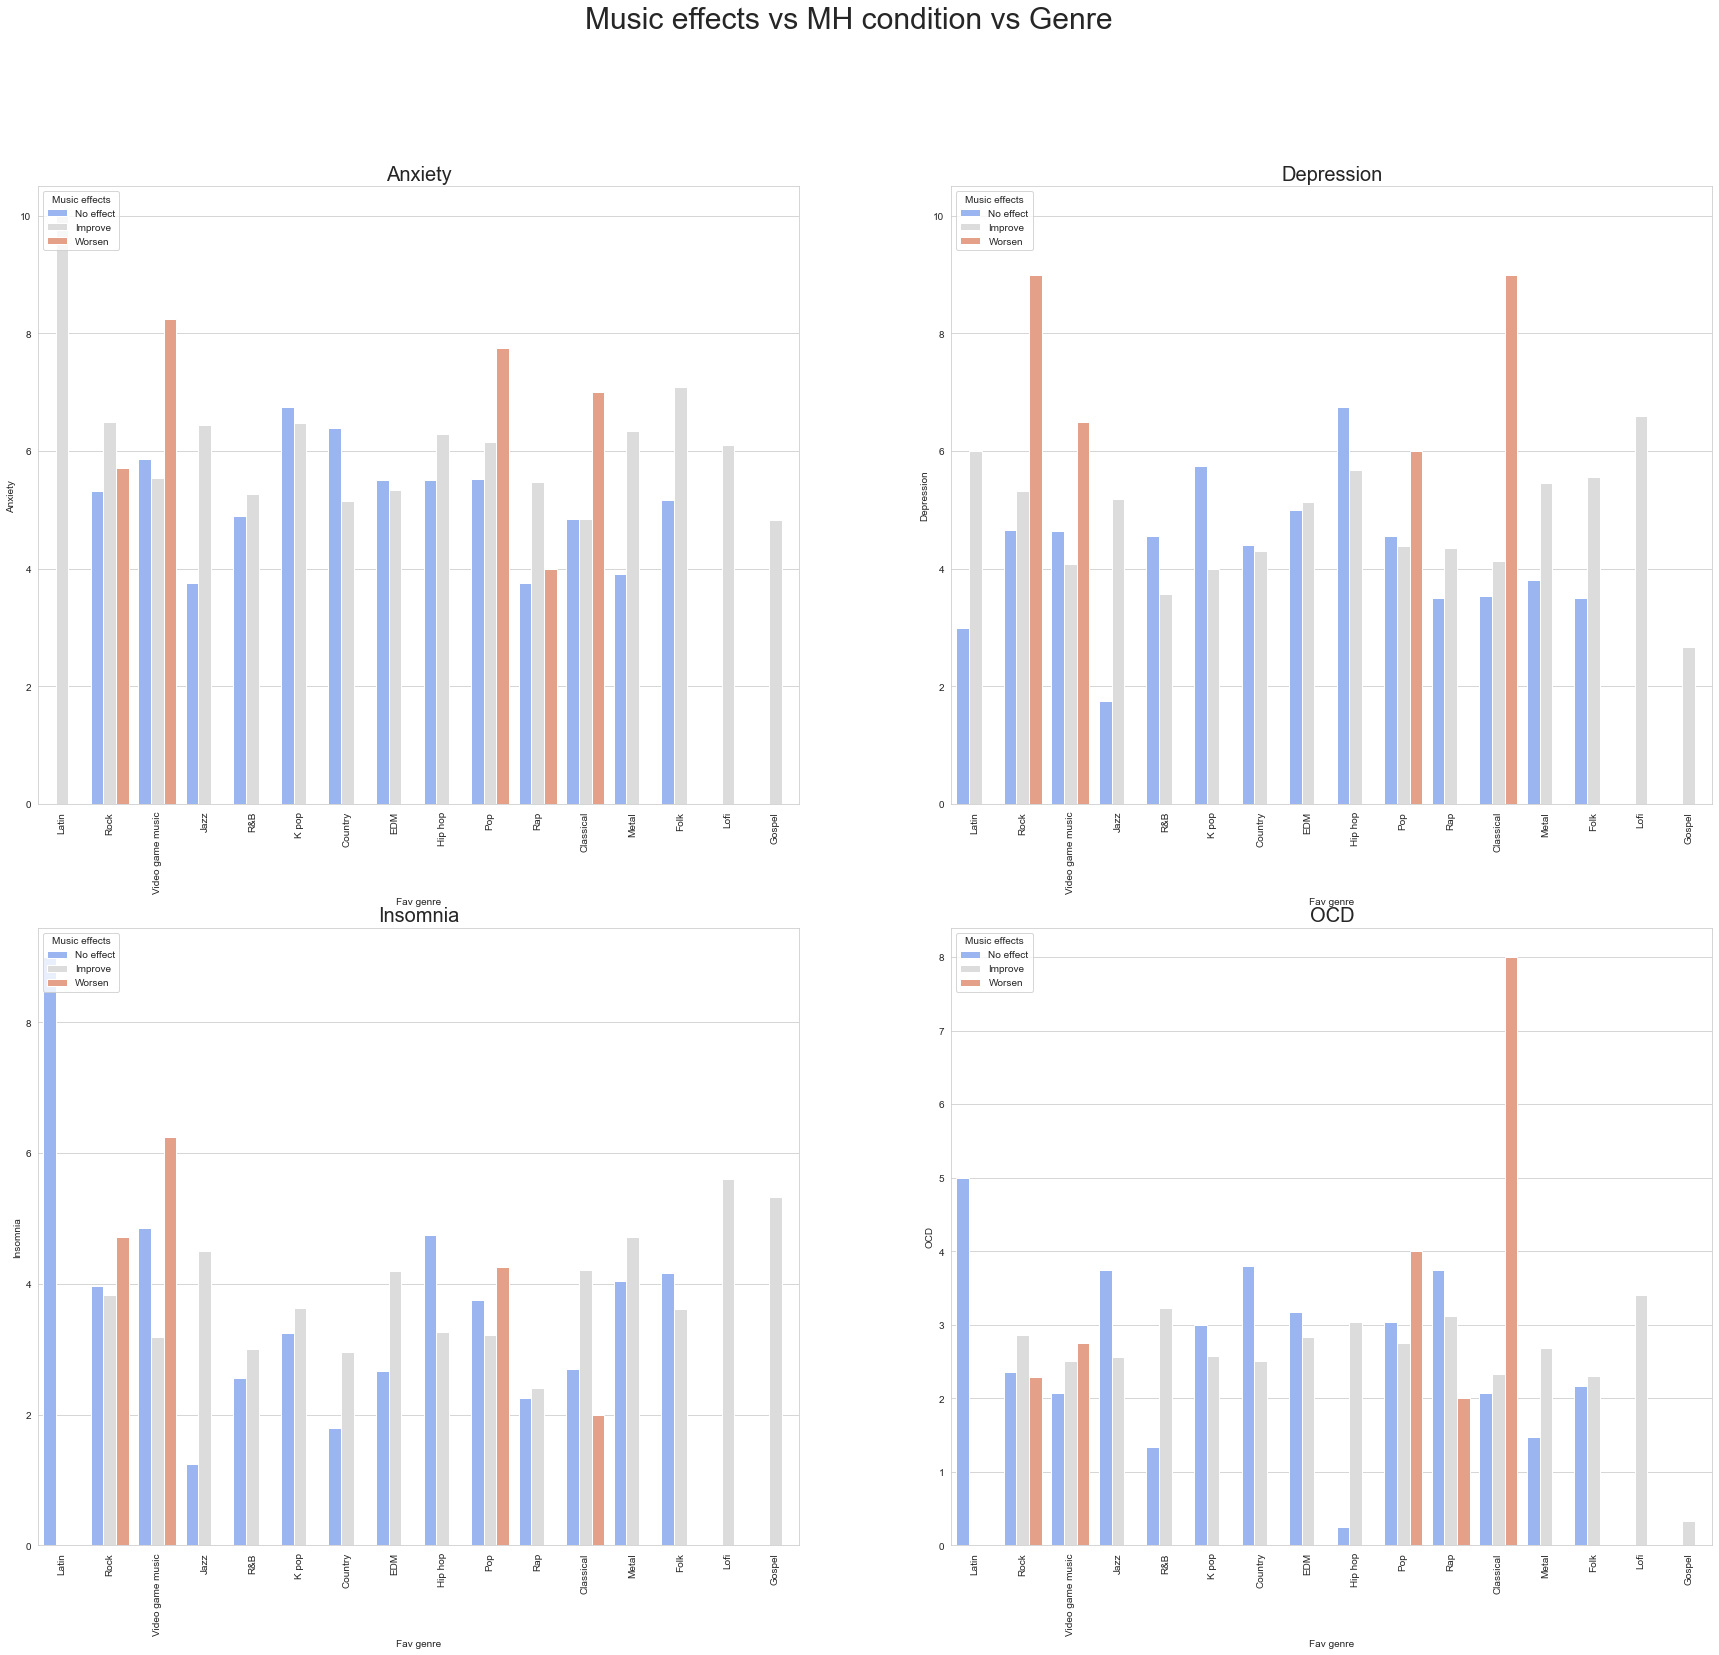

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(30, 25))
fig.suptitle('Music effects vs MH condition vs Genre', fontsize=30)
# fig.tight_layout(pad=15.0)

sns.barplot(x=df_original['Fav genre'], y=df_original['Anxiety'], hue=df_original['Music effects'], errwidth=0, palette='coolwarm', ax=ax[0, 0])
# ax[0,0].xticks(rotation=90)
ax[0,0].set_title('Anxiety', fontsize=20)

sns.barplot(x=df_original['Fav genre'], y=df_original['Depression'], hue=df_original['Music effects'], errwidth=0, palette='coolwarm', ax=ax[0, 1])
# ax[0,1].xticks(rotation=90)
ax[0,1].set_title('Depression', fontsize=20)

sns.barplot(x=df_original['Fav genre'], y=df_original['Insomnia'], hue=df_original['Music effects'], errwidth=0, palette='coolwarm', ax=ax[1, 0])
# ax[1,0].xticks(rotation=90)
ax[1,0].set_title('Insomnia', fontsize=20)

sns.barplot(x=df_original['Fav genre'], y=df_original['OCD'], hue=df_original['Music effects'], errwidth=0, palette='coolwarm', ax=ax[1, 1])
# ax[1,1].xticks(rotation=90)
ax[1,1].set_title('OCD', fontsize=20)

ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)

plt.savefig("./Plots/Genre vs MH vs Music effects.png")
plt.show()

In [23]:
# fig, ax = plt.subplots(figsize=(20,20))
# dataplot = sns.heatmap(df.corr(), cmap="magma", annot=True)
# # plt.figure(figsize =(10,10))
# plt.show()

In [24]:
# Remove last 6 columns as they are not required for the analysis
# df_predict = df.iloc[:, 26:] # this includes the music effects column as well
# df_features = df.iloc[:, :26]
# df_predict.head()

# # normalize the data
# scaler = StandardScaler()

# df_features= pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)
# df_predict = pd.DataFrame(scaler.fit_transform(df_predict), columns=df_predict.columns)

In [25]:
# get the top 5 columns with the highest correlation with the variable 'anxiety'
# add Anxiety column to df_features
# def get_corr(col):
#     df_features[col] = df_predict[col]
#     anxiety_corr = df_features.corr().abs()[col].sort_values(ascending=False)[1:6]
#     # sns.set_style('whitegrid')
#     sns.heatmap(anxiety_corr.to_frame(), annot=True, cmap='magma')
#     plt.title(f'Correlation with {col}')
#     plt.show()
    
#     df_features.drop(columns=col, inplace=True)



# for to_predict in df_predict.columns:
#     get_corr(to_predict)


In [26]:
# fig, ax = plt.subplots(figsize=(15,15))
# sns.heatmap(df_features.iloc[:, 11:].corr(), cmap="magma", annot=True)
# plt.show()

In [27]:
# m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]

# mental_df = df[m_all]
# mental_df.round(0).astype(int)

# disorder_count = []
# for disorder in m_all:
#     x=0
#     while x !=11:
#         count =  (mental_df[disorder].values == x).sum()
#         disorder_count.append(count)
#         x +=1

In [28]:
# print(len(disorder_count))

# Prediction Model

In [29]:
df_c1 = df.copy()
df_c1.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,4,3.0,1,1,1,8,1,1,156.0,...,3,2,3,0,2,3.0,0.0,1.0,0.0,-1
2,18.0,4,4.0,0,0,0,15,0,1,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,1
4,18.0,4,4.0,1,0,0,12,1,0,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,0
5,18.0,4,5.0,1,1,1,6,1,1,86.0,...,3,3,3,3,0,8.0,8.0,7.0,7.0,0
6,18.0,5,3.0,1,1,0,15,1,1,66.0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,0


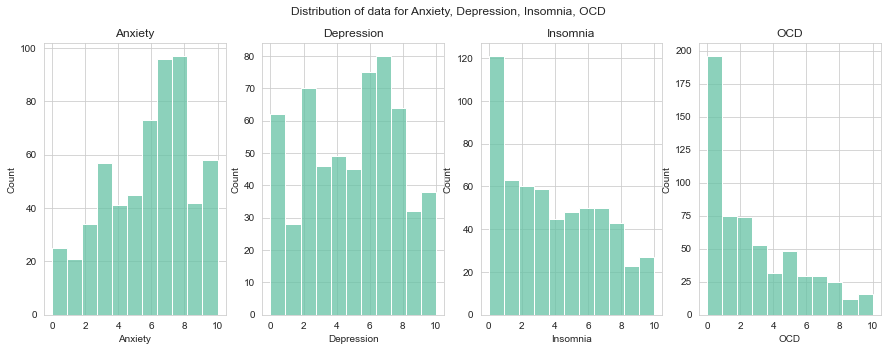

In [30]:
# For the columns Anxiety, Depression, Insomnia, OCD, give the distribution of data
# for each of the columns

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Distribution of data for Anxiety, Depression, Insomnia, OCD')

sns.histplot(df['Anxiety'], ax=ax[0])
ax[0].set_title('Anxiety')

sns.histplot(df['Depression'], ax=ax[1])
ax[1].set_title('Depression')

sns.histplot(df['Insomnia'], ax=ax[2])
ax[2].set_title('Insomnia')

sns.histplot(df['OCD'], ax=ax[3])
ax[3].set_title('OCD')

# plt.savefig('./Plots/Distribution of data for Anxiety, Depression, Insomnia, OCD.png')
plt.show()

In [31]:
# Divide each of the columns into 3 categories - Low, Medium, High
# Low - 0-5
# High - 6-10

df_c1['Anxiety_Class'] = df_c1['Anxiety'].apply(lambda x: 'Low' if x <= 5 else 'High')
df_c1['Depression_Class'] = df_c1['Depression'].apply(lambda x: 'Low' if x <= 5 else 'High')
df_c1['Insomnia_Class'] = df_c1['Insomnia'].apply(lambda x: 'Low' if x <= 5 else 'High')
df_c1['OCD_Class'] = df_c1['OCD'].apply(lambda x: 'Low' if x <= 5 else 'High')

# Drop the original columns
df_c1.drop(columns=['Anxiety', 'Depression', 'Insomnia', 'OCD'], inplace=True)
df_c1.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects,Anxiety_Class,Depression_Class,Insomnia_Class,OCD_Class
0,18.0,4,3.0,1,1,1,8,1,1,156.0,...,3,2,3,0,2,-1,Low,Low,Low,Low
2,18.0,4,4.0,0,0,0,15,0,1,132.0,...,1,0,1,1,3,1,High,High,High,Low
4,18.0,4,4.0,1,0,0,12,1,0,107.0,...,2,3,3,0,1,0,High,Low,Low,High
5,18.0,4,5.0,1,1,1,6,1,1,86.0,...,3,3,3,3,0,0,High,High,High,High
6,18.0,5,3.0,1,1,0,15,1,1,66.0,...,1,1,0,0,2,0,Low,High,High,Low


In [32]:
# Predict the depression level based on the other columns

# Split the data into train and test
X_d = df_c1.drop(columns=['Depression_Class', 'Anxiety_Class', 'Insomnia_Class', 'OCD_Class'])
y_d = df_c1['Depression_Class']

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)


# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_d = scaler.fit_transform(X_train_d)

# Use K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_d, y_train_d)

# Predict the values for the test data
y_pred_d = knn.predict(X_test_d)

# Check the accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_d, y_pred_d))

0.5423728813559322


In [33]:
# Drop some coliunms to see if the accuracy improves

# Keep only Age, Hours per day
X_a = df_c1[['Age', 'Hours per day', 'Fav genre', 'Instrumentalist', 'Composer', 'BPM']]
y_a = df_c1['Anxiety_Class']

from sklearn.preprocessing import StandardScaler
# Normalize the data
X_a = pd.DataFrame(StandardScaler().fit_transform(X_a), columns=X_a.columns)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2, random_state=42)
print(X_train_a.shape, X_test_a.shape, y_train_a.shape, y_test_a.shape)

(471, 6) (118, 6) (471,) (118,)


In [34]:
# Using decision tree classifier
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier()
dtc.fit(X_train_a, y_train_a)

# Predict the values for the test data
y_pred_a = dtc.predict(X_test_a)

# Check the accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_a, y_pred_a))

0.5677966101694916


In [35]:
# Apply PCA to reduce the number of columns

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_a_pca = pca.fit_transform(X_train_a)
X_test_a_pca = pca.transform(X_test_a)

# Using decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_a_pca, y_train_a)

# Predict the values for the test data
y_pred_a_pca = dtc.predict(X_test_a_pca)

# Check the accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_a, y_pred_a_pca))

0.576271186440678


In [36]:
# Apply PCA to reduce the number of columns
accuracy = []
for i in range(1, 5):
    from sklearn.decomposition import PCA

    pca = PCA(n_components=i)
    X_train_a_pca = pca.fit_transform(X_train_a)
    X_test_a_pca = pca.transform(X_test_a)

    # Using decision tree classifier
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train_a_pca, y_train_a)

    # Predict the values for the test data
    y_pred_a_pca = dtc.predict(X_test_a_pca)

    # Check the accuracy of the model
    from sklearn.metrics import accuracy_score
    print(accuracy_score(y_test_a, y_pred_a_pca))

0.5423728813559322
0.5847457627118644
0.6186440677966102
0.5508474576271186


### Logistic Regression after PCA

In [37]:
# take music effects as y and rest as x
df_c2 = df.copy()
X_m = df_c2.drop(columns=['Music effects'])

y_m = df_c2['Music effects']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.2, random_state=42)

X_train_m.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
151,32.0,4,3.0,1,1,1,14,1,1,144.0,...,1,2,3,1,3,1,6.0,6.0,7.0,5.0
184,18.0,4,2.0,1,1,0,7,1,1,98.0,...,0,2,3,2,0,1,7.0,2.0,3.0,5.0
91,43.0,1,6.0,1,1,1,15,1,1,109.0,...,1,2,1,0,2,3,5.0,4.0,8.0,3.0
551,34.0,4,3.0,1,0,0,0,0,1,95.0,...,2,1,0,0,2,2,0.0,0.0,0.0,0.0
311,22.0,4,2.0,1,1,1,2,1,1,120.0,...,3,2,2,3,2,3,6.0,4.0,0.0,1.0


Best accuracy:  0.7457627118644068  for components:  7


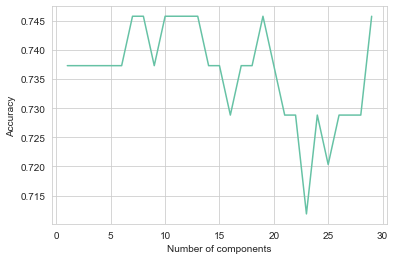

In [38]:
from sklearn.linear_model import LogisticRegression
# perform PCA for components in range 1 to 5
accuracies = []
best_accuracy = 0
best_components = 0
for i in range(1, 30):
    from sklearn.decomposition import PCA

    pca = PCA(n_components=i)
    X_train_m_pca = pca.fit_transform(X_train_m)
    X_test_m_pca = pca.transform(X_test_m)

    # Using logistic regression

    lr = LogisticRegression()
    lr.fit(X_train_m_pca, y_train_m)

    # Predict the values for the test data
    y_pred_m_pca = lr.predict(X_test_m_pca)
    
    # Check the accuracy of the model
    from sklearn.metrics import accuracy_score
    accuracy  = accuracy_score(y_test_m, y_pred_m_pca)
    accuracies.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_components = i

print("Best accuracy: ", best_accuracy, " for components: ", best_components)
# plot the graph for accuracy vs components
import matplotlib.pyplot as plt
plt.plot(range(1, 30), accuracies)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.show()